In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
import seaborn as sns
sns.set()

In [121]:
X=pd.read_csv("train_6BJx641.csv")

In [122]:
X.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0
26495,34895,2017-06-23 23:00:00,-2.1,-11.4,1009.0,71.880,A,210.0


In [123]:
X[X.index.isnull()]

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption


In [124]:
X.dtypes

ID                           int64
datetime                    object
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
var2                        object
electricity_consumption    float64
dtype: object

In [125]:
X.datetime=pd.to_datetime(X.datetime)

#X[X['datetime']=='2013']

In [126]:
X.set_index('datetime',inplace=True)
X.index=pd.DatetimeIndex(X.index)
X.tail()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
datetime,,,,,,,
2017-06-23 19:00:00,34891,-0.7,-15.0,1009.0,51.685,A,225.0
2017-06-23 20:00:00,34892,-2.9,-11.4,1005.0,56.105,A,213.0
2017-06-23 21:00:00,34893,-1.4,-12.9,995.0,61.275,A,213.0
2017-06-23 22:00:00,34894,-2.9,-11.4,996.0,67.210,A,210.0
2017-06-23 23:00:00,34895,-2.1,-11.4,1009.0,71.880,A,210.0


Text(0.5, 1.0, 'temperature over time')

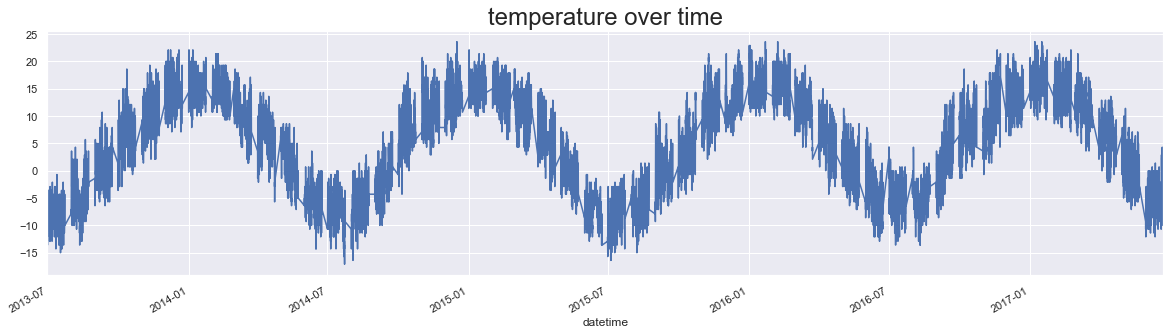

In [127]:
X.temperature.plot(figsize=(20,5))
plt.title("temperature over time",size=24)

Text(0.5, 1.0, 'pressure over time')

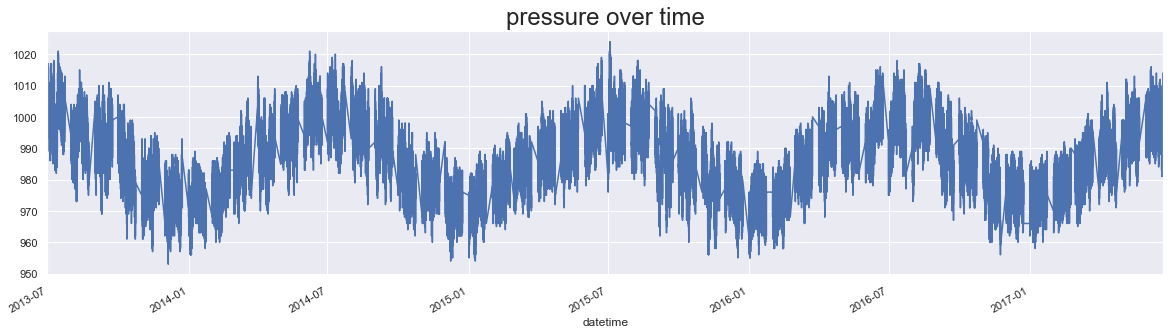

In [128]:
X.pressure.plot(figsize=(20,5))
plt.title("pressure over time",size=24)

Text(0.5, 1.0, 'windspeed over time')

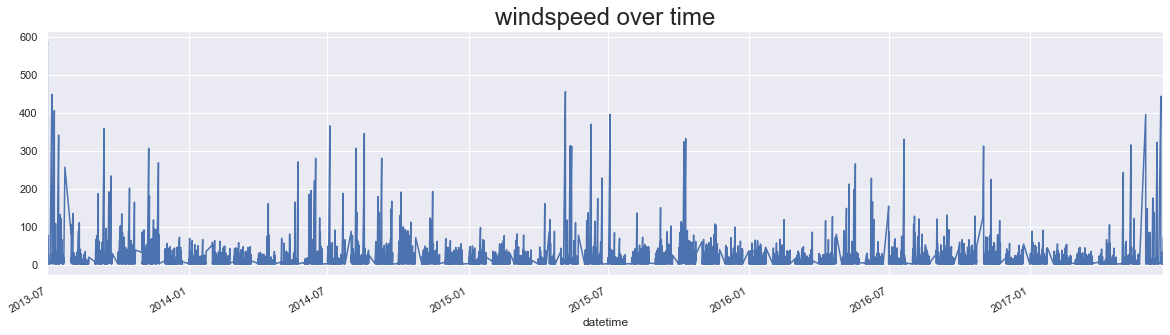

In [129]:
X.windspeed.plot(figsize=(20,5))
plt.title("windspeed over time",size=24)

Text(0.5, 1.0, 'electricity_consumption over time')

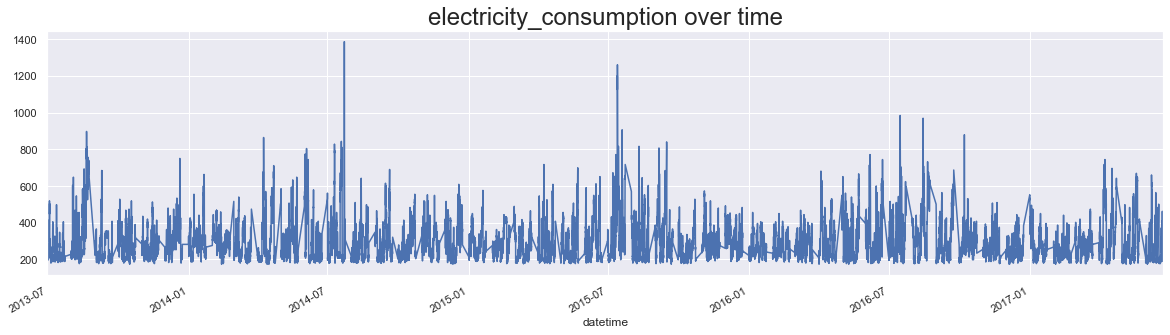

In [130]:
X.electricity_consumption.plot(figsize=(20,5))
plt.title("electricity_consumption over time",size=24)

# Forecasting of Electricity Consumption using ARIMA

Text(0.5, 1.0, 'ACF for electricity_consumption')

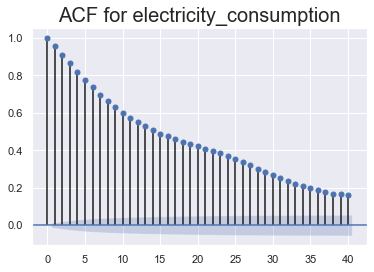

In [131]:
sgt.plot_acf(X.electricity_consumption, lags = 40)
plt.title("ACF for electricity_consumption", size = 20)

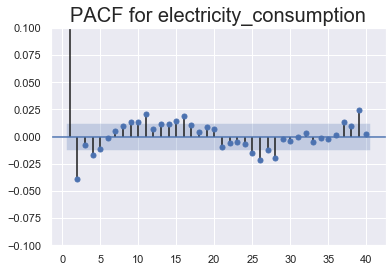

In [13]:
sgt.plot_pacf(X.electricity_consumption, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for electricity_consumption", size = 20)
plt.ylim(-0.1,0.1)
plt.show()

In [14]:
sts.adfuller(X.electricity_consumption) #as p value is very low there is no stationarity

(-17.591909019062903,
 3.960099500324556e-30,
 38,
 26457,
 {'1%': -3.4305971910865534,
  '5%': -2.861649251241277,
  '10%': -2.566828151195233},
 258329.58108431558)

In [15]:
#model_1 = ARMA(X.electricity_consumption, order=(1,1,1))
#results_1 = model_1.fit()
#results_1.summary()

In [16]:
#X['returns'] = X.electricity_consumption.pct_change(1)*100

In [17]:
#X['returns']=X['returns'].iloc[1:]

In [18]:
#sgt.plot_acf(X.returns, lags = 40, alpha = 0.05, zero = False)
#plt.title("PACF for electricity_consumption", size = 20)
#plt.ylim(-0.1,0.1)
#plt.show()

In [19]:
# Seasonal ARIMA model with pmdarima
# Install pmdarima via PIP
import pmdarima as pm

In [20]:
mySA = pm.auto_arima(X.electricity_consumption,error_action="ignore", suppress_warnings = True,
                     seasonal = False, m = 12, start_q = 1, start_p = 1, 
                     max_order = 5, max_d = 1,
                     stepwise = False,with_intercept=False, trace = True) 
#auto arima will give the best model fit based in AIC

Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=380422.125, BIC=380430.309, Time=2.513 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=False); AIC=347290.603, BIC=347306.972, Time=2.538 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=False); AIC=323431.123, BIC=323455.677, Time=8.128 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 0) (constant=False); AIC=307626.954, BIC=307659.693, Time=6.719 seconds
Fit ARIMA: (0, 0, 4)x(0, 0, 0, 0) (constant=False); AIC=297029.467, BIC=297070.391, Time=12.194 seconds
Fit ARIMA: (0, 0, 5)x(0, 0, 0, 0) (constant=False); AIC=289689.021, BIC=289738.129, Time=16.374 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=259411.064, BIC=259427.433, Time=0.269 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=False); AIC=259403.606, BIC=259428.160, Time=0.517 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=False); AIC=259400.789, BIC=259433.528, Time=0.671 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 0) (constant=False); AIC=259401.970, BIC

In [21]:
mySA.summary() #we got the model p d anf d of 2 0 2 respectively

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                26496
Model:               SARIMAX(2, 0, 2)   Log Likelihood             -129425.265
Date:                Wed, 13 May 2020   AIC                         258860.531
Time:                        23:05:12   BIC                         258901.455
Sample:                             0   HQIC                        258873.740
                              - 26496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9509      0.001   1624.019      0.000       1.949       1.953
ar.L2         -0.9509      0.001   -791.604      0.000      -0.953      -0.949
ma.L1         -0.9585      0.003   -382.536      0.000      -0.963      -0.954
ma.L2         -0.0407      0.002    -16.501      0.000      -0.046      -0.036
sigma2      1023.8104      1.770    578.436      0.000    1020.341    1027.279
===================================================================================
Ljung-Box (Q):                      146.85   Jarque-Bera (JB):           3374988.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
model_1 = ARMA(X.electricity_consumption, order=(2,0,2))
results_1 = model_1.fit()
results_1.summary() #We have a lowest AIC and 0 p value

D:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                
===================================================================================
Dep. Variable:     electricity_consumption   No. Observations:                26496
Model:                          ARMA(2, 0)   Log Likelihood             -129415.601
Method:                            css-mle   S.D. of innovations             31.988
Date:                     Wed, 13 May 2020   AIC                         258839.202
Time:                             23:05:17   BIC                         258871.941
Sample:                                  0   HQIC                        258849.769
                                                                                   
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           298.2625      4.204     70.939      0.000     290.022     306.503
ar.L1.electricity_consumption     0.9926      0.006    161.705      0.000       0.981       1.005
ar.L2.electricity_consumption    -0.0393      0.006     -6.406      0.000      -0.051      -0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0512           +0.0000j            1.0512            0.0000
AR.2           24.1910           +0.0000j           24.1910            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
#X.electricity_consumption.plot(figsize=(20,5))
#plt.title("electricity_consumption over time",size=24)
#r.plot()

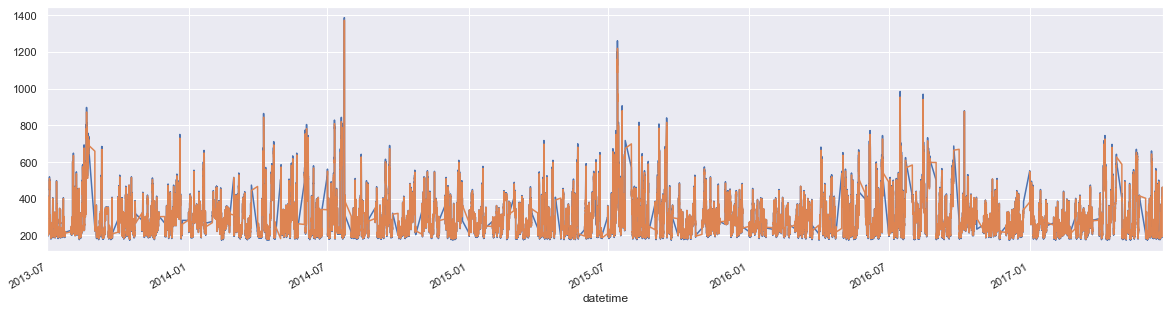

In [24]:
X.electricity_consumption.plot(figsize=(20,5))
plt.plot(results_1.fittedvalues) #we can say that it is the best fit

In [25]:
# Custom function to test for a normal distribution
def resid_histogram(data):
    import matplotlib.pyplot as plt
    from numpy import linspace
    from scipy.stats import norm

    plt.figure(figsize=(10,6))
    plt.hist(data, bins = 'auto', density = True, rwidth = 0.85,
             label = 'Residuals')
    mean_resid, std_resid = norm.fit(data)
    xmin, xmax = plt.xlim()
    curve_length = linspace(xmin, xmax, 100)
    bell_curve = norm.pdf(curve_length, mean_resid, std_resid)
    plt.plot(curve_length, bell_curve, 'm', linewidth = 2)
    plt.grid(axis='y', alpha = 0.2)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.title('Residuals vs Normal Distribution - Mean = '+str(round(mean_resid,2))+', Std = '+str(round(std_resid,2)))
    plt.show()

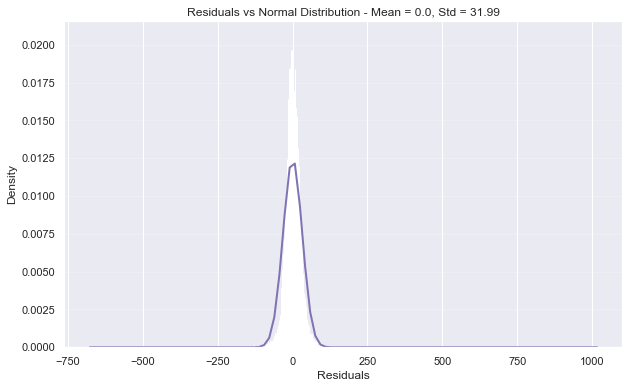

In [26]:
resid_histogram(results_1.resid) #we can see that the residual is normally distributed around mean

In [27]:
np.mean(results_1.resid)

0.0013758264813879429

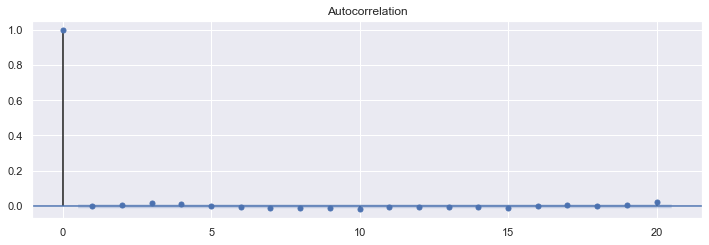

In [28]:
# ACF plot to test for autocorrelation in the residuals
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sgt.plot_acf(results_1.resid, lags=20, ax=ax1) #we can clearly see that there is no correlation left in the 
#residual

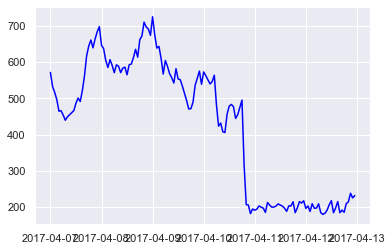

In [29]:
#X.electricity_consumption.plot(figsize=(20,5),color='red')
plt.plot(results_1.predict(start="04-07-2017 00:00:00",end='04-12-2017 23:00:00'),color='blue')

# Forecasting of Temperature

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  ExponentialSmoothing(endog, trend=None, damped=False, seasonal=None, seasonal_periods=None, dates=None, freq=None, missing='none')
 |  
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      Time series
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of periods in a complete seasonal cycle, e.g., 4 for
 |      quarterly data or 7 for daily data with a weekly cycle.
 |  
 |  Returns
 |  -------
 |  results : ExponentialSmoothing class
 |  
 |  Notes
 |  -----
 |  This is a full implementatio

In [135]:
expsmodel = ExponentialSmoothing(X.temperature, seasonal = "additive",
                                 seasonal_periods = 12)

D:\New folder (2)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [136]:
# Fitting the model
# Default: optimized = True
# Optional: Insert smoothing coefficients
expsmodelfit = expsmodel.fit()

D:\New folder (2)\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
D:\New folder (2)\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [137]:
# Getting the alpha smoothing coefficient
expsmodelfit.params['smoothing_level']

0.88433942475273

In [138]:
# Getting the gamma smoothing coefficient
expsmodelfit.params['smoothing_seasonal']

0.027636323841141452

In [146]:
# Prediction with the predict method
# Alternative: expsmodelfit.forecast(steps = 12)
expsfcast = expsmodelfit.fittedvalues

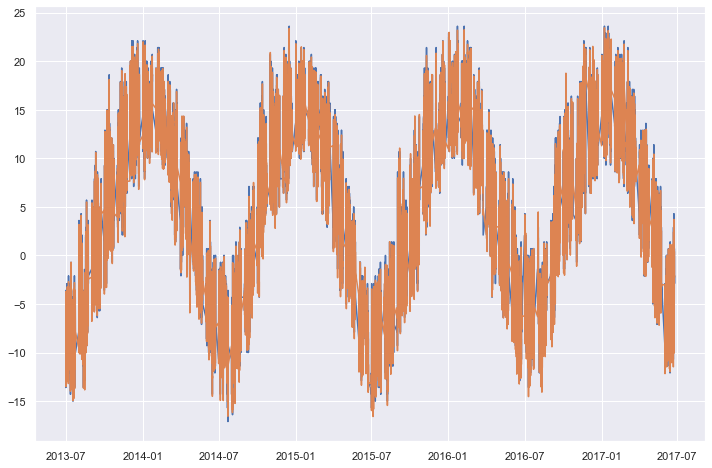

In [148]:
# Plotting the predicted values and the original data
plt.figure(figsize=(12,8))
plt.plot(X.temperature, label='data')
plt.plot(expsfcast, label='HW forecast')
#we can see that how well the exponential smooting fitted the value